<a href="https://colab.research.google.com/github/AshuMaths1729/COVID-19_XRay_Classifier/blob/master/evaluate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19 diagnosis using PA view XRay Images**


---



Submitted as part of the SAMHAR COVID-19 Hackathon

*Contributors*
*   Ashutosh Agrahari (ashutoshmathsgenius@gmail.com)
*   Ankur Veer (ankurveer011@gmail.com)
*   Anshuman Singh (singhanshuman999@gmail.com)



In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import plot_model
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [0]:
# Hyperparams
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE

In [0]:
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), border_mode='same', input_shape=input_shape, activation='relu'))
model.add(Conv2D(32, (3, 3), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (1, 1), border_mode='same', activation='relu'))
model.add(Conv2D(64, (1, 1), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), border_mode='same', activation='relu'))
model.add(Conv2D(128, (3, 3), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (2, 2), border_mode='same', activation='relu'))
model.add(Conv2D(256, (2, 2), border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(3))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(224, 224,..., activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", 

In [0]:
# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
!ls

sample_data


In [0]:
# Restore the weights
## Get model from : https://drive.google.com/file/d/1bvRqYpnxW4QDZoRIWvBdu1sg5ci-yAPR/view
! wget -O trained_weights "https://drive.google.com/file/d/1bvRqYpnxW4QDZoRIWvBdu1sg5ci-yAPR/view"
## Or load from Google Drive after having access from Ashutosh Agrahari.

In [0]:
model.load_weights('trained_weights')

In [0]:
path = 'nejmoa2001191_f4.jpeg'

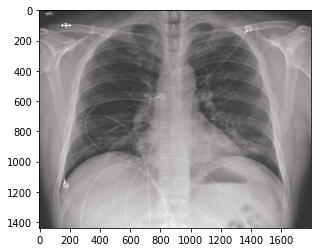

In [29]:
img = cv2.imread(path,-1)
plt.imshow(img)
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#result = []
images = np.vstack([x])
classes = list(model.predict(images))

In [30]:
print("Seems to be a ", end='')
if max(classes[0]) == classes[0][0]:
    print("COVID-19 Case")
elif max(classes[0])== classes[0][1]:
    print("NORMAL Case")
elif max(classes[0])== classes[0][2]:
    print("PNEUMONIA Case")

Seems to be a COVID-19 Case
